In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Read in csv files
path = './train.csv'
train = pd.read_csv(path)
members_data = pd.read_csv('./members_v3.csv')
pd.options.display.max_columns = None

In [3]:
# get shapes of datasets - caution this cell takes a while to load.
print("train.shape: ", train.shape)
print ("members_data.shape: ", members_data.shape)

train.shape:  (992931, 2)
members_data.shape:  (6769473, 6)


In [4]:
members_data

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915
...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020


In [5]:
# combine members data with train dataset to prep for initial EDA
members_data= train.merge(members_data, how='left', on='msno')

In [6]:
members_data

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0
...,...,...,...,...,...,...,...
992926,tUM0yxAj50Vc35vQZ++xMlomdyeLJUW9lEcoPnt3H+g=,0,12.0,24.0,male,4.0,20170201.0
992927,KQS8etmfGgvE/7Y9gK+E9wdLnRTI0lyyPXaXL3I8E4c=,0,15.0,17.0,female,4.0,20170210.0
992928,8/jDLgNREuWI9hcKVYp8723nmavn01T+AuMWkK3uM7g=,0,NaN,NaN,NaN,NaN,NaN
992929,iNV99F1Rml7EMndOeLI0Y/iek6aCj/Qp1Z4dZvR+sak=,0,1.0,0.0,NaN,7.0,20170215.0


# EDA on how features might impact churn, Combine derived features into an aggregated dataframe

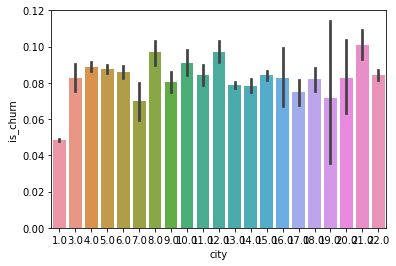

In [7]:
# plot the churn rate by city. No key is provided on the city, but we can look at the rates
sns.barplot(data=members_data, x='city', y='is_churn');

# results show that the city does have a meaningful variance in churn, lets create a field that reps churn rate

In [8]:
# create a city churn dataframe
city_churn_avg = members_data.groupby(['city'])[['is_churn']].mean().reset_index()
city_churn_avg.sort_values(by='is_churn', ascending=False)
city_churn_avg.columns = ['city', 'city_churn_avg']
city_churn_avg

,city,city_churn_avg
0,1.0,0.048411
1,3.0,0.082924
2,4.0,0.088935
3,5.0,0.087631
4,6.0,0.086043
5,7.0,0.069767
6,8.0,0.096749
7,9.0,0.080352
8,10.0,0.091076
9,11.0,0.084108


In [9]:
# merge city churn with train data for easy merging downstream
members_data = members_data.merge(city_churn_avg, how='left', on='city')
members_data

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,city_churn_avg
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0,0.082249
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0,0.091076
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0,0.084108
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0,0.078733
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0,0.082924
...,...,...,...,...,...,...,...,...
992926,tUM0yxAj50Vc35vQZ++xMlomdyeLJUW9lEcoPnt3H+g=,0,12.0,24.0,male,4.0,20170201.0,0.097196
992927,KQS8etmfGgvE/7Y9gK+E9wdLnRTI0lyyPXaXL3I8E4c=,0,15.0,17.0,female,4.0,20170210.0,0.084233
992928,8/jDLgNREuWI9hcKVYp8723nmavn01T+AuMWkK3uM7g=,0,NaN,NaN,NaN,NaN,NaN,NaN
992929,iNV99F1Rml7EMndOeLI0Y/iek6aCj/Qp1Z4dZvR+sak=,0,1.0,0.0,NaN,7.0,20170215.0,0.048411


,is_churn
gender,
female,0.086366
male,0.088446


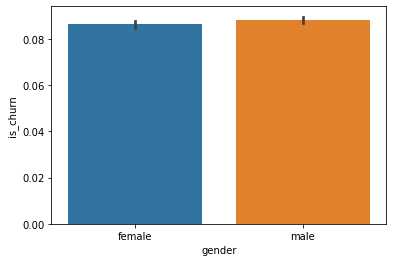

In [10]:
# plot the churn rate by gender
sns.barplot(data=members_data, x='gender', y='is_churn');
members_data.groupby(['gender'])[['is_churn']].mean().sort_values(by='is_churn')
# results show that the gender doesnt have a meaningful variance in churn

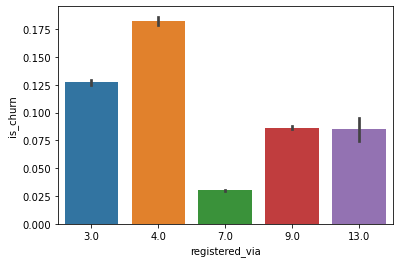

In [11]:
# plot the churn rate by registration method
sns.barplot(data=members_data, x='registered_via', y='is_churn');
# results show that the registration method does have a meaningful variance in churn
# let's add a field that represents the average churn rate by registration method

In [12]:
# create a registration method ID churn dataframe
registered_via_churn_avg = members_data.groupby(['registered_via'])[['is_churn']].mean().reset_index()
registered_via_churn_avg.sort_values(by='is_churn', ascending=False)
registered_via_churn_avg.columns = ['registered_via', 'registered_via_churn_avg']
registered_via_churn_avg

,registered_via,registered_via_churn_avg
0,3.0,0.127090
1,4.0,0.182558
2,7.0,0.030160
3,9.0,0.086362
4,13.0,0.085196


In [13]:
# combine members_data with the derived registration type dataframe
members_data = members_data.merge(registered_via_churn_avg, on='registered_via', how='left')

In [14]:
members_data

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,city_churn_avg,registered_via_churn_avg
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,female,9.0,20050406.0,0.082249,0.086362
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,male,9.0,20050407.0,0.091076,0.086362
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,female,9.0,20051016.0,0.084108,0.086362
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,female,9.0,20051102.0,0.078733,0.086362
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,male,9.0,20051228.0,0.082924,0.086362
...,...,...,...,...,...,...,...,...,...
992926,tUM0yxAj50Vc35vQZ++xMlomdyeLJUW9lEcoPnt3H+g=,0,12.0,24.0,male,4.0,20170201.0,0.097196,0.182558
992927,KQS8etmfGgvE/7Y9gK+E9wdLnRTI0lyyPXaXL3I8E4c=,0,15.0,17.0,female,4.0,20170210.0,0.084233,0.182558
992928,8/jDLgNREuWI9hcKVYp8723nmavn01T+AuMWkK3uM7g=,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992929,iNV99F1Rml7EMndOeLI0Y/iek6aCj/Qp1Z4dZvR+sak=,0,1.0,0.0,NaN,7.0,20170215.0,0.048411,0.030160


# output derived dataframe

In [15]:
members_grouped = members_data[['msno', 'city_churn_avg', 'registered_via_churn_avg']].copy()

In [16]:
members_grouped.to_csv(path_or_buf='./members_grouped.csv')